In [3]:
# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string

# NLTK
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# ML


# other stuff
from collections import Counter

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [5]:
df = pd.read_csv('/content/integrated_dataset.csv')
df

,text,label
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless hear...",1
2,"All wrong, back off dear, forward doubt. Stay ...",1
3,I've shifted my focus to something else but I'...,1
4,"I'm restless and restless, it's been a month n...",1
...,...,...
8944,Iâ€™ve been just kind of denying or ignoring t...,1
8945,Body Pulling after waking up. I woke up this m...,1
8946,mole on my back left my mind racing link to pi...,0
8947,another health scare so about an hour ago? i w...,1


In [6]:
df.columns

Index(['text', 'label'], dtype='object')

In [7]:
print(f"Shape of text : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color":"#F3FFFF","color":"BLACK","border": "1.5px  solid black"})

Shape of text : (8949, 2)

Glimpse of The Dataset :


,text,label
0,oh my gosh,0
1,"trouble sleeping, confused mind, restless heart. All out of tune",1
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1
3,I've shifted my focus to something else but I'm still worried,1
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1


In [8]:
df.tail().style.set_properties(**{"background-color": "#F3FFFF","color":"BLACK","border": "1.5px  solid black"})

,text,label
8944,Iâ€™ve been just kind of denying or ignoring this problem for awhile... Occasionally I get either bright red blood in the bowl or like these weird pinkish red chunks in it. Like I ate a shredded reddish pink peep and came back out the same on the other end. Iâ€™ve had a colonoscopy and I was told I have internal hemorrhoids. But I didnâ€™t mention this. Iâ€™m an idiot I know. I have an appointment in May and I promise Iâ€™ll tell my doctor then. Unrelated but I was in a car accident recently. I go to college out of state so my parents came up to help me as I am injured. It happened again today (I highly doubt it is related to the accident as this has been happening for years). I want to finally tell them but Iâ€™m afraid theyâ€™ll think itâ€™s related to the accident and freak out thinking Iâ€™m dying and rush me to the er. I could email my doc as this is easier to admit over email rather than spoken word. But I am also afraid the doc will freak out and try to get me to go to the er. Do I wait til the appointment or what?,1
8945,"Body Pulling after waking up. I woke up this morning and immediately slammed into a wall. It feels like someone put bricks in the left side of my head and my overall balance is completely off when I'm standing, sitting or laying down. The left side of my head is just super heavy and is affecting my walking. It just feels like my entire body is being pulled to the left constantly. It's been about 40 minutes and it is still occuring. I'm super scared it's MS or a Brain tumor because it's ALL I can find when I look it up. Has anyone ever experienced this before?",1
8946,"mole on my back left my mind racing link to pic here-> [https://i.imgur.com/hvj7FhW.jpg](https://i.imgur.com/hvj7FhW.jpg) &#x200B; I found this mole two days ago on my back, just behind my left armpit. I honestly don't know if it's new or not. I measured it and it is 7-8 mm in length, 5 mm in width. &#x200B; we have holiday in my country now from friday through monday so all the doctors offices will be open again on tuesday. never wished for a long weekend to be over so quick before lol.",0
8947,"another health scare so about an hour ago? i would say, i out of nowhere got this weird crampy kindof feeling on the left side behind my knee. itâ€™s long gone, but now i have this weird kindof .. dull throbbing cramp like sensation (i dont know how to explain it) coming on and off above my knee on my thigh. of course, i went to google and discovered what a DVT was and am now terrified i have a blood clot forming. my leg isnt swelling, tender, or warm to the touch. i know this doesnt really have much to do with it, but im 16 years old and quite healthy. you think this is another thing im just freaking out over?",1
8948,"pregnancy scare i convinced myself i had gotten pregnant after not using a condom (even tho he pulled out) because my period was 3 weeks late. i truly thought the only way out of it was to kill myself, and i was mentally preparing to die for weeks without telling anyone else. turns out my period was just late. i need to chill.",0


In [9]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8949 non-null   object
 1   label   8949 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.0+ KB
None


In [10]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,8949.000000,0.279137,0.448600,0.000000,0.000000,0.000000,1.000000,1.000000


In [11]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,8949,8861,ni-ki best boy,11


In [12]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

Null Values of Dataset :


,text,label
0,0,0


In [13]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

After Dropping, Null Values of  Dataset :


,text,label
0,0,0


In [14]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 88 duplicate entries among 8949 entries in  dataset.


In [15]:
df = df.sample(frac = 1)

In [16]:
df['label'].value_counts().to_frame().T.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "1.5px  solid black"})

label,0,1
count,6451,2498


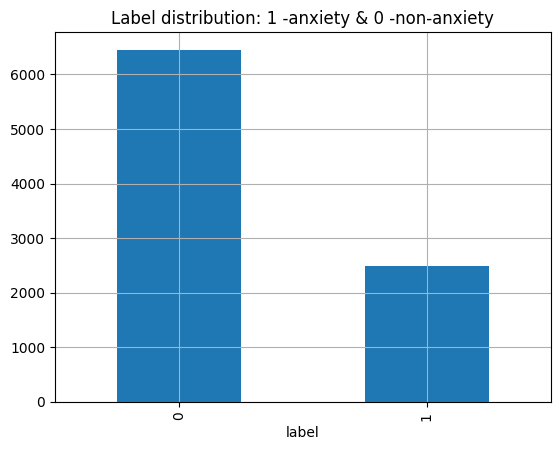

In [18]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety & 0 -non-anxiety')
plt.grid()
plt.show()

In [19]:
pip install wordcloud

In [20]:
from wordcloud import WordCloud

Preprocessing

In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup
import re

In [22]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [23]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
pip install spacy

In [25]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

CONTRACTION MAPPING AND LEMMATIZER

In [26]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is","should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are","we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b", "", newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = re.sub('[m]{2,}', 'mm', newString)

    # Tokenize the text
    tokens = word_tokenize(newString)

    # Lemmatize each word
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the lemmatized tokens back into a single string
    newString = ' '.join(lemmatized)

    return newString

In [29]:
pip install beautifulsoup4

In [30]:
print(df)

                                                   text  label
2284  lah, thanks, it hasn't arrived yet, it's pinne...      0
4017                            Already ento lkaken big      0
6577                       kokou0202haruki ............      0
8200  Is my tailbone supposed to feel like this? I'm...      0
6638                                       SE MURI JYP?      0
...                                                 ...    ...
4788  What you sow is what you will reap. ..Karma is...      0
1542                                                bye      0
6185  Thank God, I think that more and more fans are...      1
5983  Tweet: vvQUPKelE3Y6jcZFrumkFEPR6cCT702RT2in9Tf...      0
587   Looking for a job and the prospect of becoming...      1

[8949 rows x 2 columns]


In [31]:
df['cleaned'] = df["text"].apply(text_cleaner)

df.to_excel('cleaned_data.xlsx', index=False)

<ipython-input-28-3830f03cc46b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "lxml").text


In [32]:
pip install lxml

WORLDCLOUD VISUALIZATION


Glimpse of Social Media Text WordCloud :


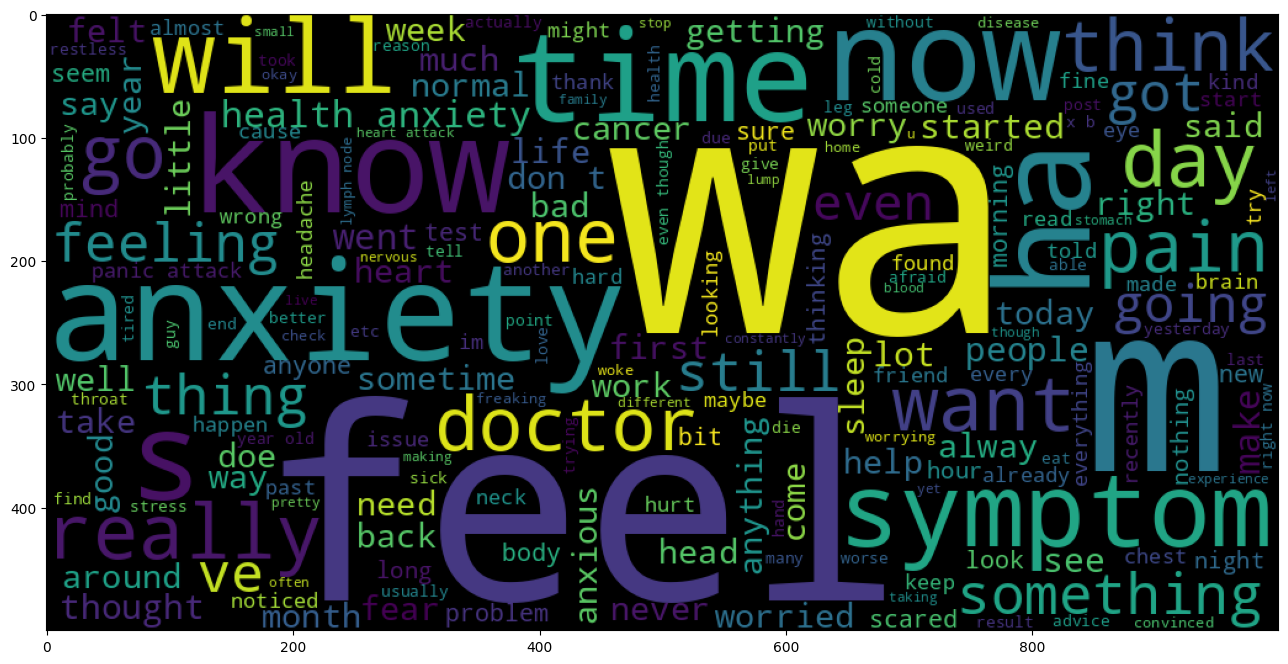

In [33]:
print(f"\nGlimpse of Social Media Text WordCloud :")
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [34]:
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])


Glimpse of Normal Text WordCloud :


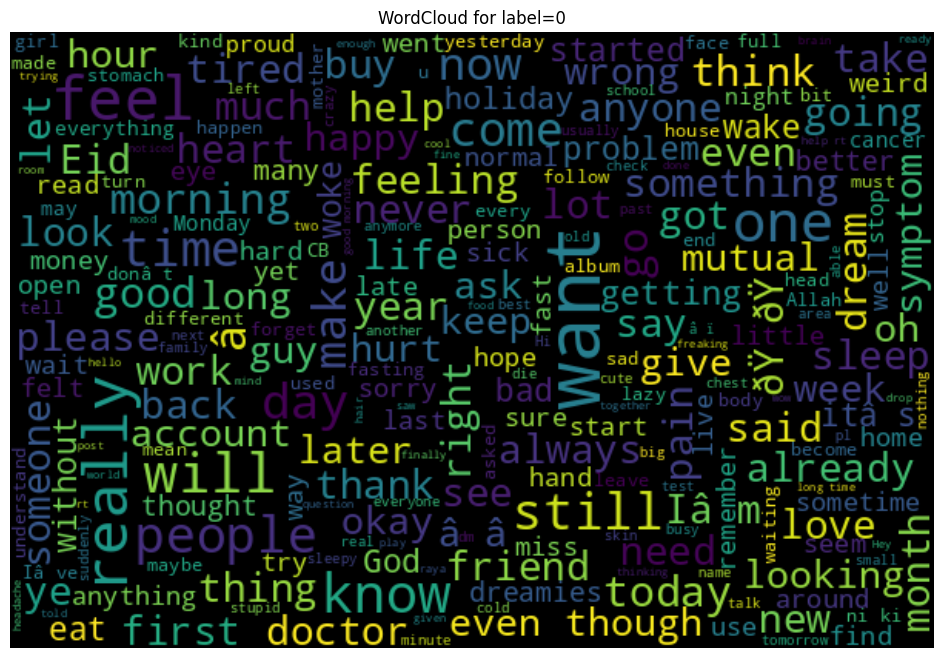

In [35]:
print(f"\nGlimpse of Normal Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Glimpse of Anxiety Text WordCloud :


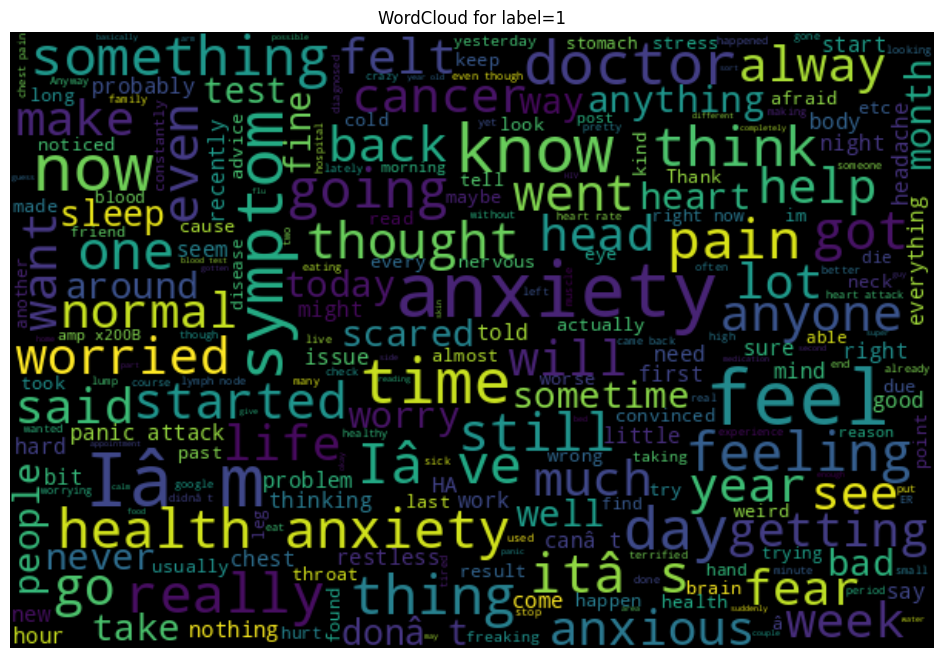

In [36]:
print(f"\nGlimpse of Anxiety Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<ipython-input-37-94546602d65d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')


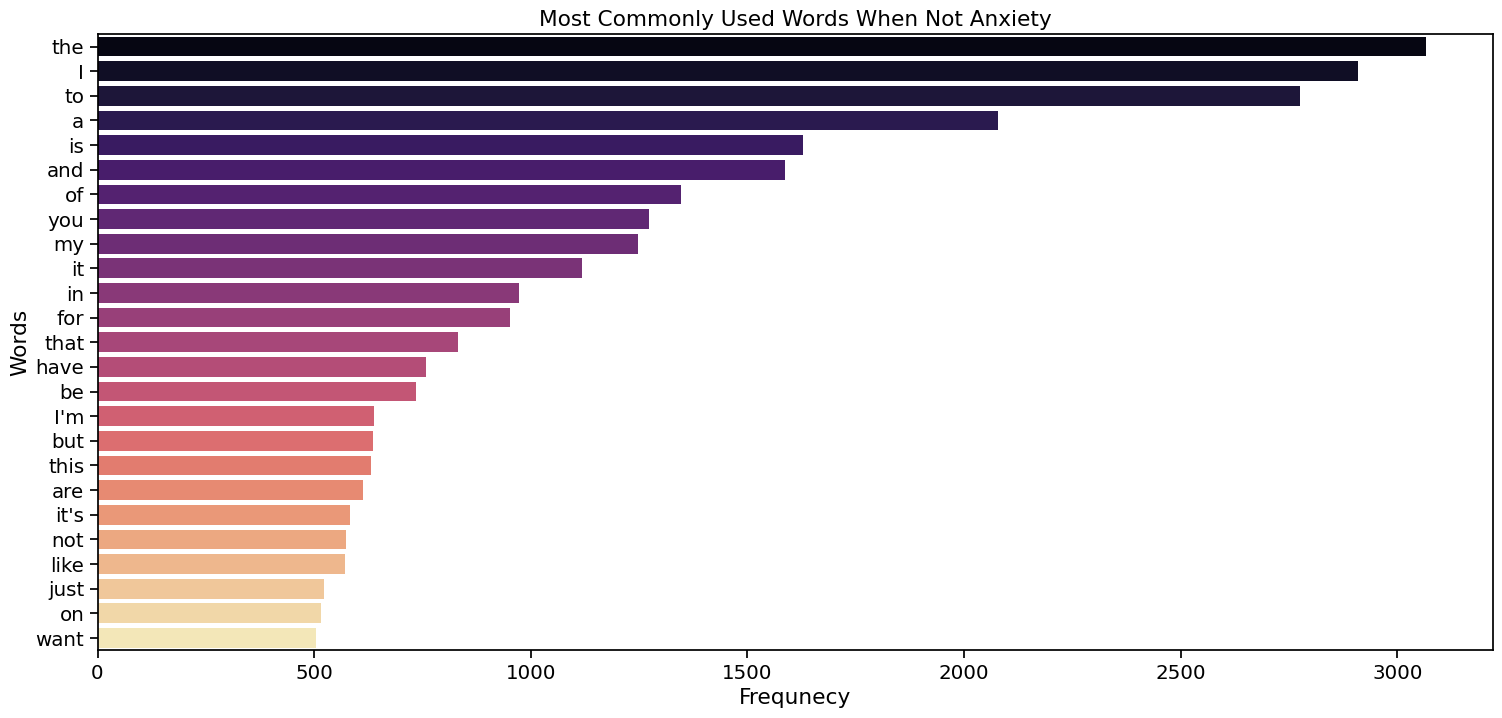

In [37]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')
plt.title("Most Commonly Used Words When Not Anxiety")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

<ipython-input-38-668dd33c31bf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')


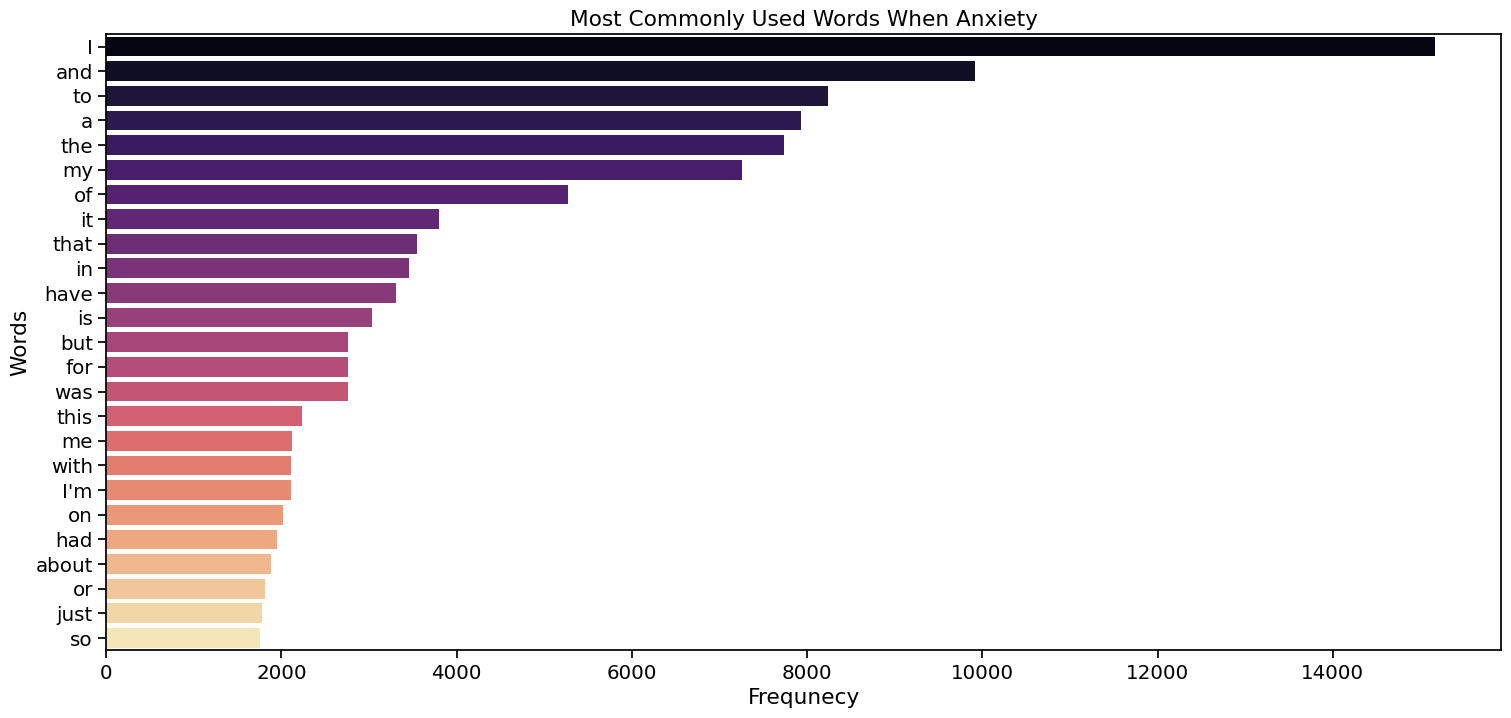

In [38]:
all_dep_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

dl = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')
plt.title("Most Commonly Used Words When Anxiety")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [39]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,cleaned
4788,What you sow is what you will reap. ..Karma is real,0,what you sow is what you will reap karma is real
1542,bye,0,bye
6185,"Thank God, I think that more and more fans are now more concerned with buying albums than hunting for printsðŸ¤— but remember, don't force it if you don't have money. It's not mandatory to buy albums—",1,thank god i think that more and more fan are now more concerned with buying album than hunting for print but remember do not force it if you do not have money it is not mandatory to buy album
5983,Tweet: vvQUPKelE3Y6jcZFrumkFEPR6cCT702RT2in9TfVndAI3XxeZOxvjVVIuNn4QTfJgDQms4 2021-05-10 02:29:34 +0000,0,tweet vvqupkele y jczfrumkfepr cct rt in tfvndai xxezoxvjvviunn qtfjgdqms
587,Looking for a job and the prospect of becoming unemployed makes me nervous ”,1,looking for a job and the prospect of becoming unemployed make me nervous


MACHINE LEARNING MODEL

In [40]:
X = df.cleaned
y = df.label

In [41]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [42]:
X_cv =vect.fit_transform(X).toarray()

In [43]:
X_cv.shape

(8949, 20000)

In [44]:
df.cleaned

,cleaned
2284,lah thanks it ha not arrived yet it is pinned
4017,already ento lkaken big
6577,kokou haruki
8200,is my tailbone supposed to feel like this i am...
6638,se muri jyp
...,...
4788,what you sow is what you will reap karma is real
1542,bye
6185,thank god i think that more and more fan are n...
5983,tweet vvqupkele y jczfrumkfepr cct rt in tfvnd...


SPLIT

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.3,random_state = 1,stratify = y)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [47]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

ADABOOST

Accuracy : 0.9042830540037244

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1936
           1       0.87      0.78      0.82       749

    accuracy                           0.90      2685
   macro avg       0.89      0.87      0.88      2685
weighted avg       0.90      0.90      0.90      2685

   ------------ Confusion Matrix -------------- 


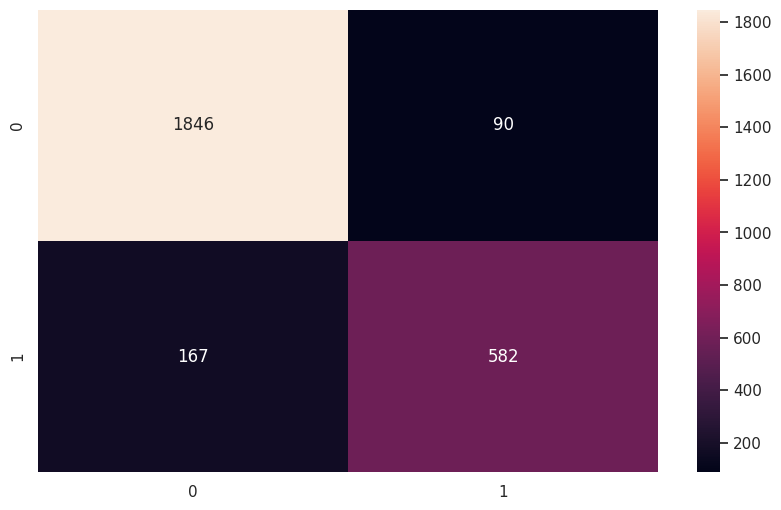

In [48]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the AdaBoost model
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = clf_adb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = clf_adb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print performance evaluation for both training and test data
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)


Training Accuracy: 0.9029374201787995
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      4515
           1       0.87      0.77      0.82      1749

    accuracy                           0.90      6264
   macro avg       0.89      0.86      0.88      6264
weighted avg       0.90      0.90      0.90      6264


Test Accuracy: 0.9042830540037244
Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1936
           1       0.87      0.78      0.82       749

    accuracy                           0.90      2685
   macro avg       0.89      0.87      0.88      2685
weighted avg       0.90      0.90      0.90      2685



Accuracy : 0.990316573556797

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1936
           1       0.99      0.98      0.98       749

    accuracy                           0.99      2685
   macro avg       0.99      0.99      0.99      2685
weighted avg       0.99      0.99      0.99      2685

   ------------ Confusion Matrix -------------- 


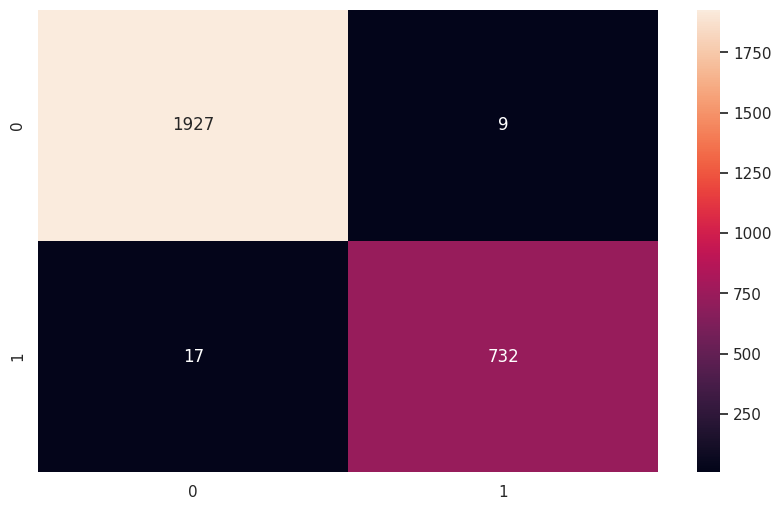

In [49]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Decision Tree model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = clf_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = clf_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print performance evaluation for both training and test data
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)


Training Accuracy: 1.0
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4515
           1       1.00      1.00      1.00      1749

    accuracy                           1.00      6264
   macro avg       1.00      1.00      1.00      6264
weighted avg       1.00      1.00      1.00      6264


Test Accuracy: 0.9891992551210428
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1936
           1       0.98      0.98      0.98       749

    accuracy                           0.99      2685
   macro avg       0.99      0.99      0.99      2685
weighted avg       0.99      0.99      0.99      2685



Accuracy : 0.9690875232774674

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1936
           1       0.97      0.91      0.94       749

    accuracy                           0.97      2685
   macro avg       0.97      0.95      0.96      2685
weighted avg       0.97      0.97      0.97      2685

   ------------ Confusion Matrix -------------- 


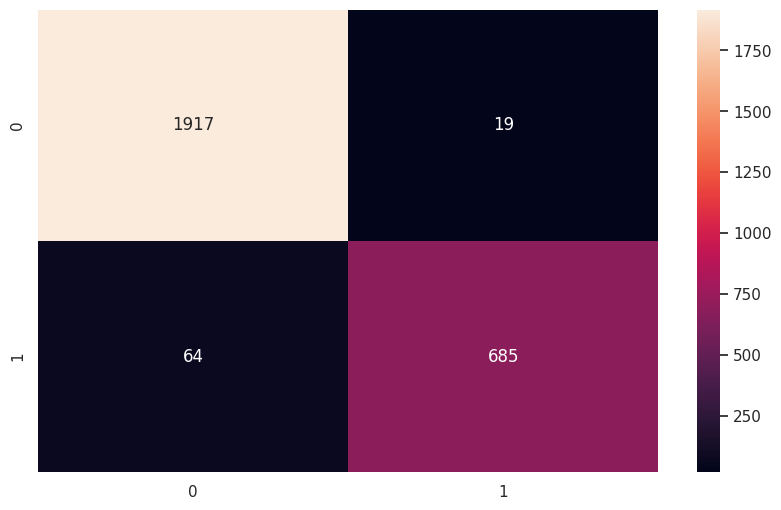

In [50]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = clf_lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = clf_lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print performance evaluation for both training and test data
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)


Training Accuracy: 0.9966475095785441
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4515
           1       1.00      0.99      0.99      1749

    accuracy                           1.00      6264
   macro avg       1.00      0.99      1.00      6264
weighted avg       1.00      1.00      1.00      6264


Test Accuracy: 0.9690875232774674
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1936
           1       0.97      0.91      0.94       749

    accuracy                           0.97      2685
   macro avg       0.97      0.95      0.96      2685
weighted avg       0.97      0.97      0.97      2685



In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = clf_lr.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
y_test_pred = clf_lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

# Print performance evaluation for both training and test data
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:\n", train_report)

print("\nTest Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_report)


Training Accuracy: 0.9966475095785441
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4515
           1       1.00      0.99      0.99      1749

    accuracy                           1.00      6264
   macro avg       1.00      0.99      1.00      6264
weighted avg       1.00      1.00      1.00      6264


Test Accuracy: 0.9690875232774674
Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1936
           1       0.97      0.91      0.94       749

    accuracy                           0.97      2685
   macro avg       0.97      0.95      0.96      2685
weighted avg       0.97      0.97      0.97      2685



Accuracy : 0.9054003724394786

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1936
           1       0.85      0.81      0.83       749

    accuracy                           0.91      2685
   macro avg       0.89      0.88      0.88      2685
weighted avg       0.90      0.91      0.90      2685

   ------------ Confusion Matrix -------------- 


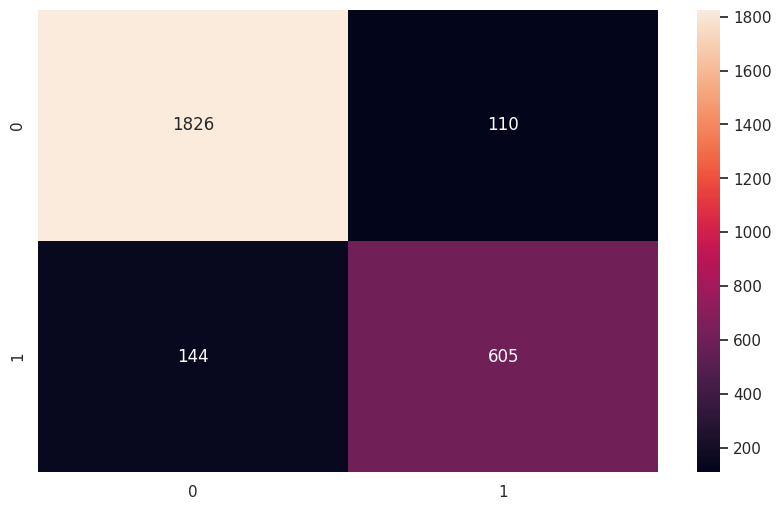

In [51]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Accuracy : 0.8245810055865922

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1936
           1       0.93      0.40      0.56       749

    accuracy                           0.82      2685
   macro avg       0.87      0.69      0.73      2685
weighted avg       0.84      0.82      0.80      2685

   ------------ Confusion Matrix -------------- 


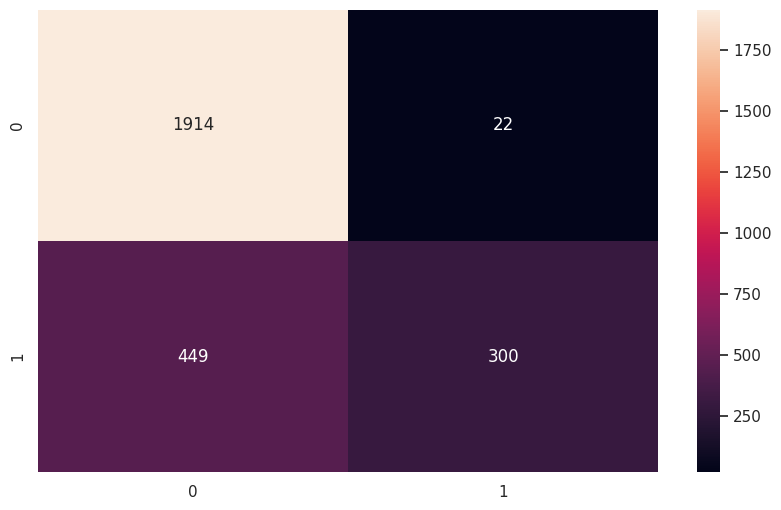

In [52]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Accuracy : 0.9556797020484171

   ------------ Classification Report -----------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1936
           1       0.93      0.91      0.92       749

    accuracy                           0.96      2685
   macro avg       0.95      0.94      0.94      2685
weighted avg       0.96      0.96      0.96      2685

   ------------ Confusion Matrix -------------- 


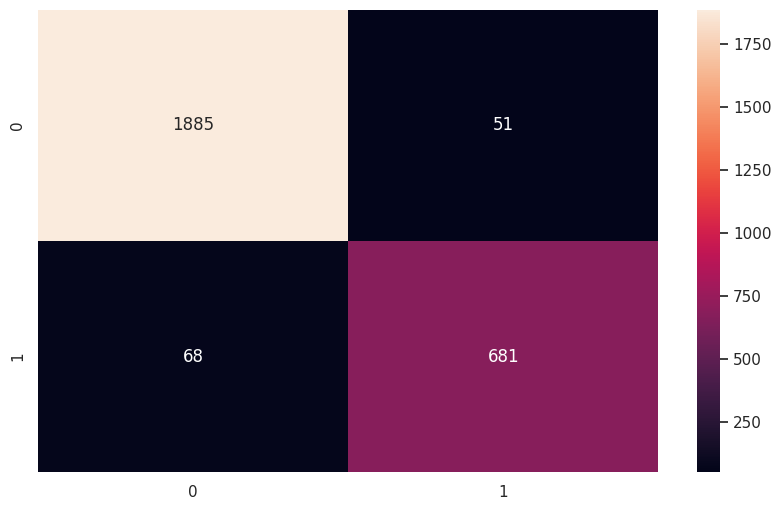

In [54]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

In [56]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(clf_dt, open(filename, 'wb'))

In [69]:
text = "i'm stress"

In [70]:
clean_text = text_cleaner(text)

In [71]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [72]:
output = {0:"No Anxiety",
          1:"Anxiety"}
print(output[single_prediction])

Anxiety
